# Проект 3: Определение перспективного тарифа для телеком-компании

## Описание проекта, тарифов и данных

### Описание проекта

*Клиентам предлагают* два тарифных плана: «Смарт» и «Ультра». Чтобы *скорректировать рекламный бюджет*, коммерческий департамент хочет понять, **какой тариф приносит больше денег**. Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. **Нужно** *проанализировать поведение клиентов* и *определить какой тариф лучше*.

### Описание тарифов

1. **Тариф «Смарт»:**
    1. Ежемесячная плата: 550 рублей
    2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
    3. *Стоимость услуг сверх тарифного пакета:* 
        1. минута разговора: 3 рубля* («Мегалайн» всегда округляет вверх значения минут и мегабайтов. *Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута*);
        2. сообщение: 3 рубля; 
        3. 1 Гб интернет-трафика: 200 рублей
        

2. **Тариф «Ультра»:**
    1. Ежемесячная плата: 1950 рублей
    2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
    3. *Стоимость услуг сверх тарифного пакета:* 
        1. минута разговора: 1 рубль; 
        2. сообщение: 1 рубль; 
        3. 1 Гб интернет-трафика: 150 рублей.

Важно: «Мегалайн» всегда **округляет секунды до минут**, а **мегабайты — до гигабайт**. 


1. Каждый **звонок округляется отдельно**: даже если он длился всего 1 секунду, будет засчитан как 1 минута.


2. Для веб-трафика *отдельные сессии не считаются*. Вместо этого общая **сумма за месяц округляется в бо́льшую сторону**. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

### Описание данных

#### Таблица users (информация о пользователях):


1. **user_id** — уникальный идентификатор пользователя;
2. *first_name* — имя пользователя;
3. *last_name* — фамилия пользователя;
4. *age* — возраст пользователя (годы);
5. *reg_date* — дата подключения тарифа (день, месяц, год);
6. *churn_date* — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных);
7. *city* — город проживания пользователя
8. **tarif** — название тарифного плана


#### Таблица calls (информация о звонках):
1. **id** — уникальный номер звонка;
2. *call_date* — дата звонка;
3. *duration* — длительность звонка в минутах;
4. **user_id** — идентификатор пользователя, сделавшего звонок;


#### Таблица messages (информация о сообщениях):
1. **id** — уникальный номер сообщения;
2. *message_date* — дата сообщения;
3. **user_id** — идентификатор пользователя, отправившего сообщение


#### Таблица internet (информация об интернет-сессиях):
1. *id* — уникальный номер сессии;
2. *mb_used* — объём потраченного за сессию интернет-трафика (в мегабайтах);
3. *session_date* — дата интернет-сессии;
4. **user_id** — идентификатор пользователя;


#### Таблица tariffs (информация о тарифах):
1. **tariff_name** — название тарифа;
2. *rub_monthly_fee* — ежемесячная абонентская плата в рублях;
3. *minutes_included* — количество минут разговора в месяц, включённых в абонентскую плату;
4. *messages_included* — количество сообщений в месяц, включённых в абонентскую плату;
5. *mb_per_month_included* — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах);
6. *rub_per_minute* — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то 7. *со 101 минуты будет взиматься плата);
8. *rub_per_message* — стоимость отправки сообщения сверх тарифного пакета;
9. *rub_per_gb* — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта);

<font color='blue'>Предварительные выводы:</font>
1. Можно объединить таблицы **USERS**, **CALLS**, **MESSAGE** и **INTERNET** на основании уникального общего столбца **user_id**. Возможно, что значения из столбца **id** также будет отображать уникальный номер для абонента и его также можно попытаться использовать в качестве дополнительного параметра для объединения.
2. Для объединения таблицы из шага 1 с таблицей **TARIFFS** можно использовать значения взятые из столбца tariff_name. В общей таблице есть также столбце **tarif**, который содержит аналогичную информацию.

## Основной проект:

### Загрузка библиотек и просмотр данных

In [1]:
import numpy as np
import pandas as pd
import datetime 
from scipy import stats as st
import matplotlib.pyplot as plt
import calendar
import warnings
warnings.filterwarnings("ignore")

# Constant values megabite in 1 gigabite
MB2GB = 1024

In [2]:
# Get data
def get_info(df, name):
    print('\n', '*' * 20, '\n')
    print(f'Общая информация для таблицы {name} \n')
    df.info()
    display(df.head(5)) 
    print(f'\n Количество NaN values для таблицы {name}: \n', df.isnull().sum())
    if name != 'user_com_info':
        print(f'\n Количество дубликатов для таблицы {name}:   ', df.duplicated().sum())
    print(f'\n Названия столбцов для таблицы {name}:'       , df.columns)
    if name == 'users':
        print('Уникальные значения в столбце city'  , np.sort(df['city'].unique()), '\n')
        print('Уникальные значения в столбце tariff', df['tariff'].unique(), '\n')    
    print('\n', '*' * 20, '\n')

    
# Get data
df_users    = pd.read_csv('/datasets/users.csv'   , sep = ',')
df_calls    = pd.read_csv('/datasets/calls.csv'   , sep = ',')
df_messages = pd.read_csv('/datasets/messages.csv', sep = ',')
df_internet = pd.read_csv('/datasets/internet.csv', sep = ',')
df_tarrif   = pd.read_csv('/datasets/tariffs.csv' , sep = ',')

# Get common information about data
info_users    = get_info(df_users   , 'users'   )
info_calls    = get_info(df_calls   , 'calls'   )
info_message  = get_info(df_messages, 'messages')
info_internet = get_info(df_internet, 'internet')
info_tarrif   = get_info(df_tarrif  , 'tariffs' ) 



 ******************** 

Общая информация для таблицы users 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra



 Количество NaN values для таблицы users: 
 user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

 Количество дубликатов для таблицы users:    0

 Названия столбцов для таблицы users: Index(['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff'],
      dtype='object')
Уникальные значения в столбце city ['Архангельск' 'Астрахань' 'Балашиха' 'Барнаул' 'Белгород' 'Брянск'
 'Владивосток' 'Владикавказ' 'Владимир' 'Волгоград' 'Волжский' 'Вологда'
 'Воронеж' 'Грозный' 'Екатеринбург' 'Иваново' 'Ижевск' 'Иркутск' 'Казань'
 'Калининград' 'Калуга' 'Кемерово' 'Киров' 'Кострома' 'Краснодар'
 'Красноярск' 'Курган' 'Курск' 'Липецк' 'Магнитогорск' 'Махачкала'
 'Москва' 'Мурманск' 'Набережные Челны' 'Нижневартовск' 'Нижний Новгород'
 'Нижний Тагил' 'Новокузнецк' 'Новороссийск' 'Новосибирск' 'Омск'
 'Оренбург' 'Орёл' 'Пенза' 'Пермь' 'Петрозаводск' 'Подольск'
 

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000



 Количество NaN values для таблицы calls: 
 id           0
call_date    0
duration     0
user_id      0
dtype: int64

 Количество дубликатов для таблицы calls:    0

 Названия столбцов для таблицы calls: Index(['id', 'call_date', 'duration', 'user_id'], dtype='object')

 ******************** 


 ******************** 

Общая информация для таблицы messages 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000



 Количество NaN values для таблицы messages: 
 id              0
message_date    0
user_id         0
dtype: int64

 Количество дубликатов для таблицы messages:    0

 Названия столбцов для таблицы messages: Index(['id', 'message_date', 'user_id'], dtype='object')

 ******************** 


 ******************** 

Общая информация для таблицы internet 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000



 Количество NaN values для таблицы internet: 
 Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

 Количество дубликатов для таблицы internet:    0

 Названия столбцов для таблицы internet: Index(['Unnamed: 0', 'id', 'mb_used', 'session_date', 'user_id'], dtype='object')

 ******************** 


 ******************** 

Общая информация для таблицы tariffs 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra



 Количество NaN values для таблицы tariffs: 
 messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64

 Количество дубликатов для таблицы tariffs:    0

 Названия столбцов для таблицы tariffs: Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff_name'],
      dtype='object')

 ******************** 



<font color='blue'>Предварительные выводы:</font>
1. Данные были успешно получены:
    1. Всего у нас есть 500 абонентов, причем у 38 из них на момент получения данных контракт с компанией Мегалайт был прекращен. (Данные из таблицы users). 
    2. В таблице calls и massege представлено по 202607 и 123036 случаев звонков и смс. Клиенты чаще используют тариф для звонков, а смс используют почти в два раза реже. Возможно часть текстовых сообщений берут на себя мессенджеры, для которых используется интернет.
    3. В таблице internet представлено 149396 случая захода в интернет. В интернет люди заходят чаще, чем пишут смс. 
    4. Как и ожидалось в таблице тариф представлено всего два тарифа.
2. На начальном моменте времени в данных нет пропусков, но они явно появятся когда мы выполним объединение таблиц в одну.
3. В явном виде в данных нет дубликатов.
4. Нужно задать соответствующий формат для некоторых столбцов, например:


<font color='red'>Таблица users:</font>
1. Изменить формат столбцов **churn_date** и **reg_date** на datetime


<font color='red'>Таблица calls</font>
1. Изменить формат столбца **call_date**
2. Округлить к большему значения в столбце **duration** и изменить тип на **int**. Кроме того, в описании данных сказано, что продолжительность разговора указана в минута тогда продолжительность не может быть, например 13.84 поскольку секунд всего 60. Но если предположить, что 0.84 это доля от 60 секунд, тогда для получения точного времени звонка нам нужно разбить данное число на две части: 13 и 0.84. Тогда 13 будет обозначать количество целых минут, а остаток умноженный на 60, будет представлять количество секунд. Но в данном случае, поскольку оператор считает, за минуту любой количество секунд отличное от 0, то мы можем смело округлить к большему числа, например 13.84 к 14 минутам.

<font color='red'>Таблица messages</font>
1. Изменить формат столбца **message_date**


<font color='red'>Таблица internet</font>
1. Удалить столбец **Unnamed: 0**
2. В столбце **mb_used** нужно: разделить на 1024, тем самым получить количество гигабайтов для каждого пользователя за одну сессию, после чего нужно будет посчитать суммарное значение для каждого пользователя.
3. Изменить формат в колонке **session_date**


<font color='red'>Таблица tariffs</font> 
На первый взгляд с данной таблице все в порядке.


### Предобработка данных 

In [3]:
def change_format(data):
    return pd.to_datetime(data, format='%Y-%m-%d')

# Change format in users table
df_users['churn_date'] = change_format(df_users['churn_date'])
df_users['reg_date']   = change_format(df_users['reg_date'])

# Change format in calls table
df_calls['call_date']  = change_format(df_calls['call_date'])
df_calls['duration']   = np.ceil(df_calls['duration']).astype('int64')


# Change format in messages table
df_messages['message_date'] = change_format(df_messages['message_date'])

# Change format in internet table
df_internet = df_internet.drop(['Unnamed: 0'], axis = 1)
df_internet['session_date'] = change_format(df_internet['session_date'])
df_internet['mb_used']      = np.ceil(df_internet['mb_used']).astype('int64')

# Get common information about data
#info_users    = get_info(df_users   , 'users'   )
#info_calls    = get_info(df_calls   , 'calls'   )
#info_message  = get_info(df_messages, 'messages')
#info_internet = get_info(df_internet, 'internet')
#info_tarrif   = get_info(df_tarrif  , 'tariffs' ) 

### Поиск грубых ошибок

Кроме того в наших данных могут содержаться грубые ошибки. Посмотрим более детально на наши данные, в частности нас интересуют следующие столбцы с данными:
1. Таблица users - столбец **age**;
2. Таблица calls - столбец **duration**; И проверить максимальную и минимальную дату из столбца  **call_date**
3. Таблица messages - столбец **message_date** проверить максимальную и минимальную дату. Является ли она адекватной.
4. Таблица internet - столбец **mb_used**, и дату	



In [4]:
def histogram(df, col, bin):
    df.plot(y = col      , title = col,
            kind = 'hist', bins  = bin,
            grid = True  )

def boxplots(df, col):
    df.plot(y = col     , title = col, 
            kind = 'box', grid = True)  

Описательная статистика: 
 count    500.00000
mean      46.58800
std       16.66763
min       18.00000
25%       32.00000
50%       46.00000
75%       62.00000
max       75.00000
Name: age, dtype: float64


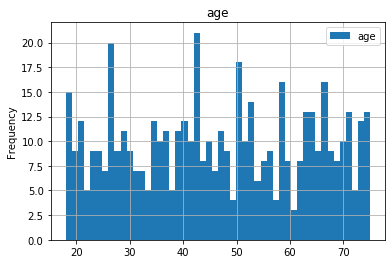

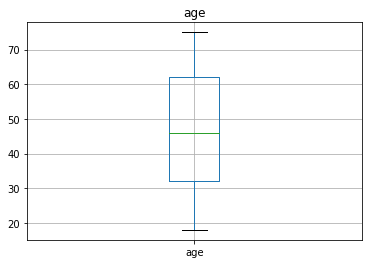

In [5]:
plot1 = histogram(df_users, 'age', 50)
plot2 = boxplots(df_users, 'age')
stat = df_users['age'].describe()
print(f'Описательная статистика: \n', stat)

Описательная статистика: 
 count    202607.000000
mean          7.158198
std           5.959173
min           0.000000
25%           2.000000
50%           6.000000
75%          11.000000
max          38.000000
Name: duration, dtype: float64


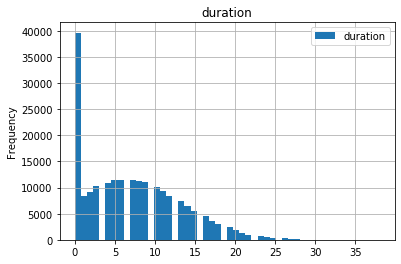

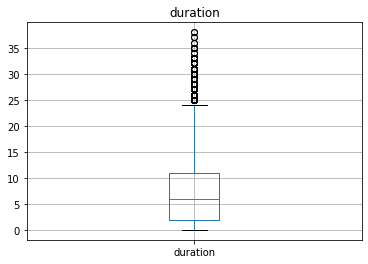

In [6]:
plot1 = histogram(df_calls, 'duration', 50)
plot2 = boxplots(df_calls, 'duration')
stat = df_calls['duration'].describe()
print(f'Описательная статистика: \n', stat)

В столбце **duration** - явно выделяются звонки с 0 продолжительностью, но по условию задания такие данные не являются ошибкой, а являются пропущенными звонками. В свою очередь звонки с продолжительностью более 25 также не будут являтся ошибкой, просто кто-то очень любит долго говорить.

In [7]:
stat = df_calls['call_date'].describe()
print(f'Описательная статистика: \n', stat)

Описательная статистика: 
 count                  202607
unique                    365
top       2018-12-31 00:00:00
freq                     1435
first     2018-01-01 00:00:00
last      2018-12-31 00:00:00
Name: call_date, dtype: object


Звонки происходили в течение одного года, в принципе и тут все нормально

In [8]:
stat = df_messages['message_date'].describe()
print(f'Описательная статистика: \n', stat)

Описательная статистика: 
 count                  123036
unique                    364
top       2018-12-31 00:00:00
freq                      859
first     2018-01-02 00:00:00
last      2018-12-31 00:00:00
Name: message_date, dtype: object


Смс отправлялись в течение одного года, в принципе и тут все нормально.

Описательная статистика: 
 count    149396.000000
mean        370.622098
std         278.387019
min           0.000000
25%         139.000000
50%         349.000000
75%         560.000000
max        1725.000000
Name: mb_used, dtype: float64


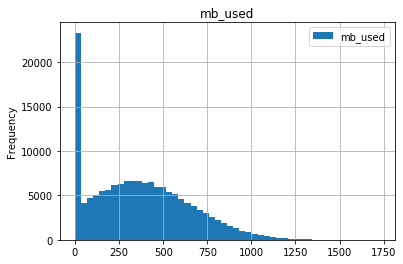

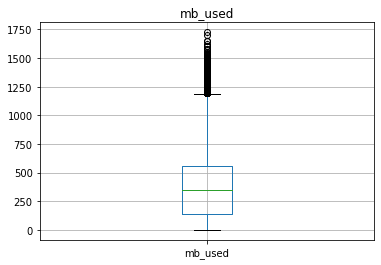

In [9]:
plot1 = histogram(df_internet, 'mb_used', 50)
plot2 = boxplots(df_internet, 'mb_used')
stat = df_internet['mb_used'].describe()
print(f'Описательная статистика: \n', stat)

В таблице с трафиком интернета есть нулевые значения, в принципе поскольку нам нужно будет посчитать суммарный трафик за месяц, такие значения не представляют особой ценности и их можно убрать

In [10]:
df_internet = df_internet.query('mb_used != 0')

Описательная статистика: 
 count    129798.000000
mean        426.581758
std         255.596114
min           1.000000
25%         228.000000
50%         401.000000
75%         593.000000
max        1725.000000
Name: mb_used, dtype: float64


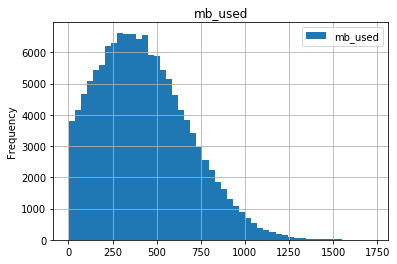

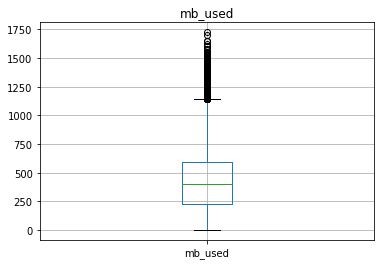

In [11]:
plot1 = histogram(df_internet, 'mb_used', 50)
plot2 = boxplots(df_internet, 'mb_used')
stat = df_internet['mb_used'].describe()
print(f'Описательная статистика: \n', stat)

Стоит отметить, что большинство наших пользователей за один раз используют от 250 до 500 мб интернетного трафика. В особенные пользователи иногда используют сразу от 1500 мб.

In [12]:
stat = df_internet['session_date'].describe()
print(f'Описательная статистика: \n', stat)

Описательная статистика: 
 count                  129798
unique                    365
top       2018-12-31 00:00:00
freq                      916
first     2018-01-01 00:00:00
last      2018-12-31 00:00:00
Name: session_date, dtype: object


С датами все в полном порядке.

<font color='blue'>Вывод по первой части:</font> Выполнен обзор исходных данных, устранены грубые ошибки, исправлены форматы данных, там где это было необходимо. 

## Компоновка данных и поиск первых ответов

На основе имеющихся данных я создам три общих таблицы, в одной таблице будут собраны пользователи и звонки, во второй пользователи и смс, в третей пользователи и интернет трафик.

In [13]:
#--------------------------------------
# input parameters: df_base - датафрейм на основе, которого будем объединять
#                   df_add  - датафрейм, который будем добавлять к df_base
#                   column  - параметр на основе, которого будем объединять
#--------------------------------------
def df_merge(df_base, df_add, column):
    df_new = df_base.merge(df_add, on = column, how = 'outer')
    return df_new

# Merge users and calls    
df_users_call     = df_merge(df_users, df_calls, 'user_id')

# Merge user and message
df_users_message  = df_merge(df_users, df_messages, 'user_id')

# Merge user and internet
df_users_internet = df_merge(df_users, df_internet, 'user_id')

In [14]:
#--------------------------------------
# input parameters: df  - input column
#                   col - column with actual data
#--------------------------------------
def add_data(df, col):
    df['year']  = pd.DatetimeIndex(df[col]).year
    df['month'] = pd.DatetimeIndex(df[col]).month
    df['day']   = pd.DatetimeIndex(df[col]).day
    return df
    
# Add columns with year, month, day    
df_users_call     = add_data(df_users_call    , 'call_date'   )
df_users_message  = add_data(df_users_message , 'message_date')
df_users_internet = add_data(df_users_internet, 'session_date')    
    

In [15]:
df_users_call

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,id,call_date,duration,year,month,day
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_0,2018-07-25,0.0,2018.0,7.0,25.0
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_1,2018-08-17,0.0,2018.0,8.0,17.0
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_2,2018-06-11,3.0,2018.0,6.0,11.0
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_3,2018-09-21,14.0,2018.0,9.0,21.0
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_4,2018-12-15,6.0,2018.0,12.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202610,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,1499_215,2018-12-26,1.0,2018.0,12.0,26.0
202611,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,1499_216,2018-10-18,19.0,2018.0,10.0,18.0
202612,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,1499_217,2018-11-10,11.0,2018.0,11.0,10.0
202613,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,1499_218,2018-10-06,5.0,2018.0,10.0,6.0


Создаю датафреймы с группировкой по месяцам для звонков, сообщений и интернет трафика, и тарифовов абонентов

In [16]:
# Call by user
user_call    = df_users_call.groupby(['user_id','month']).agg({'duration':['count','sum']})

# Message by user
user_message = df_users_message.groupby(['user_id','month']).agg({'id':['count']})

# Trafic by user
user_trafic  = df_users_internet.groupby(['user_id','month']).agg({'mb_used':['mean','sum']})

# Users tarrif
user_tarrif = df_users_internet.groupby(['user_id','month']).agg({'tariff':['unique']})

Создам общий датафрейм на основе ранее полученных данных

In [17]:
user_com_info = pd.concat([user_call    , 
                           user_message , 
                           user_trafic  , 
                           user_tarrif  ], axis = 1)
# rename columns
user_com_info.columns = ['call_count' , 'call_time'   , 
                         'messages'   , 'mb_used_mean', 
                         'mb_used_sum', 'tariff_name' ]

In [18]:
user_com_info = user_com_info.replace('ultra', 'ULTRA')
user_com_info = user_com_info.replace('smart', 'SMART')
user_com_info

call_count  call_time  messages  mb_used_mean  mb_used_sum  \
user_id month                                                               
1000    5.0          22.0      159.0      22.0    564.000000       2256.0   
        6.0          43.0      172.0      60.0    528.568182      23257.0   
        7.0          47.0      340.0      75.0    500.571429      14016.0   
        8.0          52.0      408.0      81.0    521.111111      14070.0   
        9.0          58.0      466.0      57.0    583.240000      14581.0   
...                   ...        ...       ...           ...          ...   
1498    10.0         41.0      247.0      42.0    420.489796      20604.0   
1499    9.0           9.0       70.0      11.0    462.000000       1848.0   
        10.0         68.0      449.0      48.0    414.162791      17809.0   
        11.0         74.0      612.0      59.0    461.128205      17984.0   
        12.0         69.0      492.0      66.0    326.925000      13077.0   

              tariff_name  
user_id month              
1000    5.0         ULTRA  
        6.0         ULTRA  
        7.0         ULTRA  
        8.0         ULTRA  
        9.0         ULTRA  
...                   ...  
1498    10.0        SMART  
1499    9.0         SMART  
        10.0        SMART  
        11.0        SMART  
        12.0        SMART  

[3214 rows x 6 columns]

Создам функцию для визуализации информации о каждом конкретном пользователе, например с ID = 1000

In [19]:
# Function for data vizualization
# Input data: df - datafreme with merge data
#             user_id - index of users
#             sms - column name for sms
#             calls - column name for calls
#             megabytes - column name for used megabyte 

def vis_user_activiti(df, user_id, sms, calls, megabytes, 
                      plot_users = True, llimit = False ):
    # Get info about user
    if plot_users == True:
        act_user  = df.loc[user_id]                             # get user_id
        user      = act_user.loc[:, [sms, calls, megabytes]]    # get columns for users
        
        # Define limits for y axis
        y_min  = 0
        y_max  = 501
        y_step = 100
        
    else:
        user      = df.loc[:, [sms, calls, megabytes]]
        
              
    # Start visualization

    # Get month labels for our user
    month_labels = []
    for mon in user.index:
        month_labels.append(calendar.month_name[int(mon)])

    # Get visualizatiom    
    fig, ax = plt.subplots(figsize = (14, 6))
    ax1     = ax.twinx()
    ax2     = ax.twinx()

    # Plot data
    #user.plot(kind = 'bar', ax = ax1, secondary_y='mb_used_sum')
    user.plot(kind = 'bar', ax = ax1, secondary_y = megabytes)
    
    # Set labels for x axis
    x_values = np.arange(0, len(month_labels) + 1, 1)
    plt.xticks(x_values, month_labels)
    
    # Set plot title
    if plot_users == True:
        ax.set_title(f'График активности абонента с user id: {user_id}',
                     fontsize = 14, pad = 20                           )
        # Set y label
        ax.set_ylabel('Суммарное количество минут и смс от абонента'   ,
                      color = 'black', fontsize = 14, labelpad = 20)
        
        # Set y label for second axis
        ax2.set_ylabel('Использовано трафика, мб'   ,
                        color = 'black', fontsize = 14, labelpad = 50)
    
    else:
        if llimit == False:
            ax.set_title(f'График активности абонентов за 2018 год',
                         fontsize = 14, pad = 20)     
            # Define limits for y axis
            y_min  = 0
            y_max  = 5000
            y_step = 500

        else:
            ax.set_title(f'График активности абонентов за 2018 год превышающие пакетные опции',
                         fontsize = 14, pad = 20) 
            # Define limits for y axis
            y_min  = 0
            y_max  = 20000
            y_step = 2500
            
        # Set y label for second axis
        ax2.set_ylabel('Использовано трафика, гб'   ,
                        color = 'black', fontsize = 14, labelpad = 50)            
        
        # Set y label
        ax.set_ylabel('Суммарное количество звонков и смс от абонентов',
                      color = 'black', fontsize = 14, labelpad = 20)            



    
    ax.set_yticks(np.arange(y_min, y_max, y_step))
    
    ax1.set_yticks([])
    ax2.set_yticks([])



    # Additional settings parameters for x axis
    for label in ax.xaxis.get_ticklabels():
        label.set_color('black')
        label.set_rotation(15)
        label.set_fontsize(12)

    # Additional settings parameters for y axis    
    for label in ax.yaxis.get_ticklabels():
        label.set_color('black')
        label.set_fontsize(14)

    # Settings parameteres for grid
    ax.grid(True , which     = 'major', 
                   color     = 'k'    , 
                   linestyle = 'solid',
                   alpha     = 0.5    )


    ax.autoscale(tight=True)

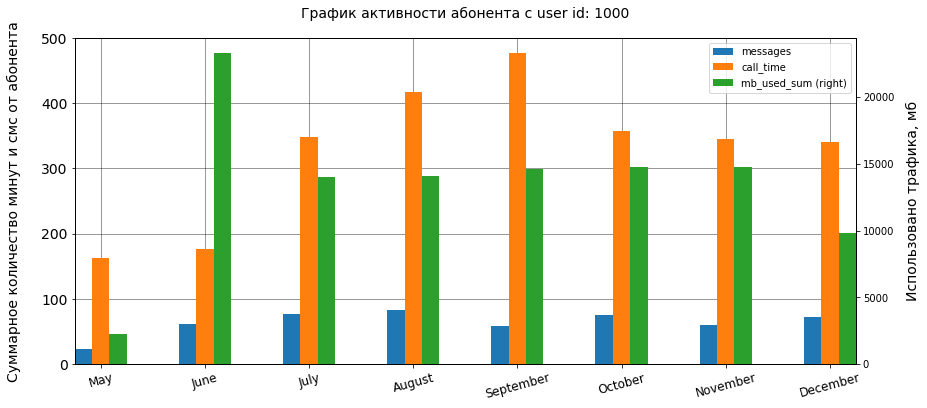

In [20]:
# Get user ID
ID = [1000]

for id_index in ID:
    plot4user = vis_user_activiti(user_com_info, id_index, 'messages', 'call_time', 'mb_used_sum')

### Анализ пропусков в данных:
    

Теперь, когда у нас есть инструмент  для визуализции данных для каждого пользователя, посчитаем помесячную выручку с каждого пользователя по месяцам. Но прежде, чем рассчитать выручку еще раз проверим данные на наличие пропусков

In [21]:
print(get_info(user_com_info, 'user_com_info'))


 ******************** 

Общая информация для таблицы user_com_info 

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3214 entries, (1000, 5.0) to (1499, 12.0)
Data columns (total 6 columns):
call_count      3174 non-null float64
call_time       3174 non-null float64
messages        2717 non-null float64
mb_used_mean    3201 non-null float64
mb_used_sum     3201 non-null float64
tariff_name     3201 non-null object
dtypes: float64(5), object(1)
memory usage: 184.2+ KB


call_count  call_time  messages  mb_used_mean  mb_used_sum  \
user_id month                                                               
1000    5.0          22.0      159.0      22.0    564.000000       2256.0   
        6.0          43.0      172.0      60.0    528.568182      23257.0   
        7.0          47.0      340.0      75.0    500.571429      14016.0   
        8.0          52.0      408.0      81.0    521.111111      14070.0   
        9.0          58.0      466.0      57.0    583.240000      14581.0   

              tariff_name  
user_id month              
1000    5.0         ULTRA  
        6.0         ULTRA  
        7.0         ULTRA  
        8.0         ULTRA  
        9.0         ULTRA


 Количество NaN values для таблицы user_com_info: 
 call_count       40
call_time        40
messages        497
mb_used_mean     13
mb_used_sum      13
tariff_name      13
dtype: int64

 Названия столбцов для таблицы user_com_info: Index(['call_count', 'call_time', 'messages', 'mb_used_mean', 'mb_used_sum',
       'tariff_name'],
      dtype='object')

 ******************** 

None


<font color='blue'>Вывод:</font> В данных есть пропуски, надо выяснить почему у нас есть пропуски.


<font color='green'>Предположения:</font>


Проверим не потеряли ли мы данные в результате слияния разных датафреймов в общий. В случае, если изначально в датафреймах **df_users**, **df_calls**, **df_messages** и **df_internet**. Данные отсутствовали, тогда можно предложить несколько вариантов заполнения пропусков.
1. **Вариант 1.** Абонент просто не использовал данный вид связи, поэтому логично предположить, что в данной графе будут пропуски. Заменим их на 0. Но предаварительно надо проверить все ли действительно так.
2. **Вариант 2.** В результате слияния данных была допущена ошибка, что и привело к возникновению пропусков
3. **Вариант 3.** В случае если значения будут отсутствовать в столбце **tariff_name** нужно выполнить более детальный анализ данных и посмотреть с чем это может быть связано.

Создам инструмент для детального анализа пропусков

In [22]:
# Find lines with nan values
def nan_testing(df, col):
    print(f'Пропуски в колонке {col} \n ')
    nan_df = df.loc[df[col].isna()]
    return nan_df

# Get more detailed information about NaN values
def get_problems(df_test, df_user, df_data, lcalls = False, lmessage = False, ltrafic = False):
    problem_user = []
    problem_data = []
    
    # Get unique index
    calls_id   = df_test.index.get_level_values('user_id').unique()
    
    # Get problem places
    for id_user in calls_id:
        problem_user.append(df_user.loc[df_user['user_id'] == id_user])
        problem_data.append(df_data.loc[df_data['user_id'] == id_user])
    
    # Use this condition to save reseurses
    if lcalls == True:
        plot4user = vis_user_activiti(user_com_info, 1373, 'messages', 'call_time', 'mb_used_sum') 
    elif lmessage == True:
        plot4user = vis_user_activiti(user_com_info, 1036, 'messages', 'call_time', 'mb_used_sum')
    elif ltrafic == True:
        plot4user = vis_user_activiti(user_com_info, 1094, 'messages', 'call_time', 'mb_used_sum')
    else:
        for id_user in calls_id:
            plot4user = vis_user_activiti(user_com_info, id_user, 'messages'   , 
                                                                  'call_time'  ,
                                                                  'mb_used_sum')
    
    # Create problems dataframes
    df_problem_user = pd.concat(problem_user, axis = 0)
    df_problem_data = pd.concat(problem_data, axis = 0)    
    
    return df_problem_user, df_problem_data

#### Анализ пропусков в данных по звонкам

Пропуски в колонке call_count 
 
Фамилии абонентов со странными звонками


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
91,1091,36,NaT,Набережные Челны,Вера,Суслова,2018-05-08,ultra
106,1106,67,NaT,Калуга,Исаак,Костин,2018-04-26,ultra
231,1231,63,NaT,Чебоксары,Касьян,Авдюков,2018-05-23,ultra
328,1328,44,NaT,Мурманск,Рауль,Аркадьев,2018-10-16,ultra
373,1373,34,NaT,Улан-Удэ,Нелли,Афанасенко,2018-01-17,smart
473,1473,18,NaT,Красноярск,Николай,Лебедев,2018-08-05,ultra
476,1476,50,NaT,Москва,Валентина,Семенова,2018-04-30,ultra
489,1489,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart


Оригинальные данные по звонкам


,id,call_date,duration,user_id
146542,1373_0,2018-09-19,9,1373
146543,1373_1,2018-05-23,8,1373
146544,1373_2,2018-02-11,2,1373
146545,1373_3,2018-09-30,0,1373
146546,1373_4,2018-05-03,5,1373
146547,1373_5,2018-10-17,0,1373
146548,1373_6,2018-10-21,0,1373
146549,1373_7,2018-04-19,0,1373
146550,1373_8,2018-10-10,3,1373
146551,1373_9,2018-01-24,0,1373


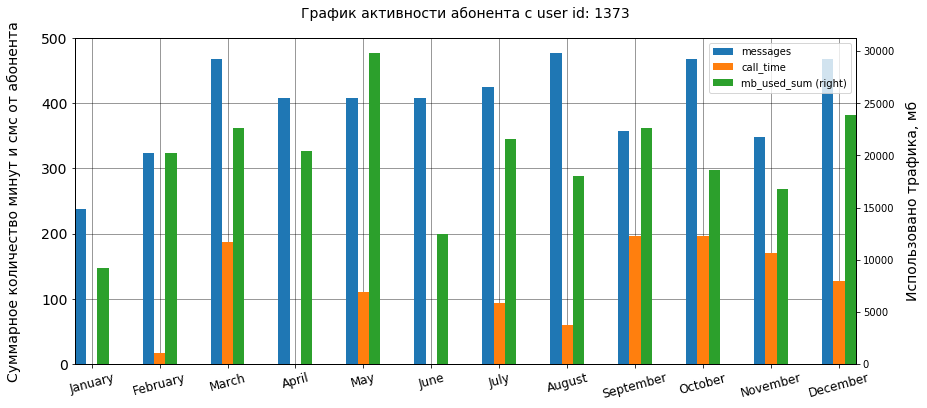

In [23]:
# Start testing
test_calls = nan_testing(user_com_info, 'call_count')

# Get data
problem_user, problem_call = get_problems(test_calls, df_users, df_calls, lcalls = True)

print('Фамилии абонентов со странными звонками')
display(problem_user)

print('Оригинальные данные по звонкам')
display(problem_call.head(10))

<font color='blue'>Вывод:</font> Анализ пропусков по звонкам показал, что предположение о том, что человек в том или ином месяц просто не использовал телефон для звонков. Остальные данные в полном порядке, что хорошо видно на графиках. Пропуски в стобцах **call_count**, **call_time** совпадают, поэтому дополнительно производить проверку по второму полю я не буду. 

#### Анализ пропусков в данных по смс

Пропуски в колонке messages 
 
Фамилии абонентов со странными смс


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
6,1006,21,NaT,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
10,1010,26,NaT,Тюмень,Эдуард,Кононов,2018-08-05,smart
17,1017,73,NaT,Краснодар,Мария,Аленникова,2018-05-22,smart
24,1024,73,NaT,Санкт-Петербург,Иулиан,Антипов,2018-10-31,ultra
...,...,...,...,...,...,...,...,...
466,1466,37,NaT,Новосибирск,Рубен,Шевцов,2018-02-28,ultra
469,1469,41,NaT,Сочи,Аксён,Абалкин,2018-07-06,ultra
476,1476,50,NaT,Москва,Валентина,Семенова,2018-04-30,ultra
479,1479,40,NaT,Хабаровск,Игорь,Богданов,2018-07-03,smart


Оригинальные данные по смс


,id,message_date,user_id
9242,1036_0,2018-10-17,1036
9243,1036_1,2018-09-06,1036
9244,1036_2,2018-08-12,1036
9245,1036_3,2018-09-28,1036
9246,1036_4,2018-10-02,1036
9247,1036_5,2018-10-12,1036
9248,1036_6,2018-08-04,1036
9249,1036_7,2018-08-29,1036
9250,1036_8,2018-09-03,1036
9251,1036_9,2018-09-05,1036


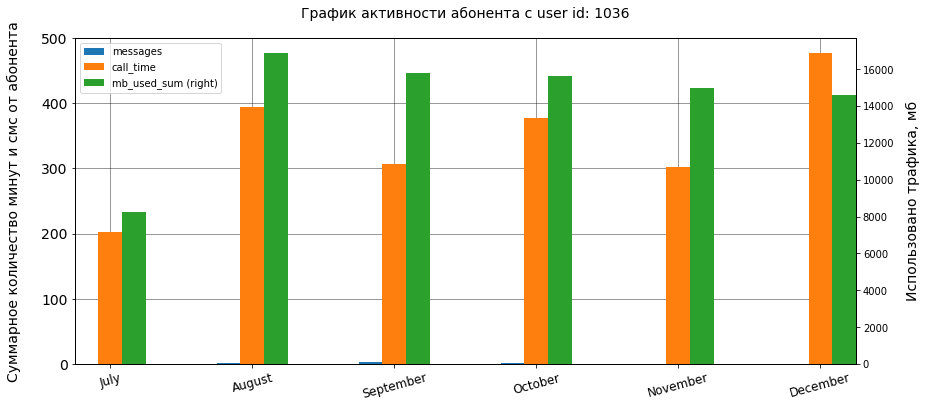

In [24]:
# Start testing
test_messages = nan_testing(user_com_info, 'messages')

# Get data
problem_user, problem_messages = get_problems(test_messages, df_users, df_messages, lmessage = True)

print('Фамилии абонентов со странными смс')
display(problem_user)

print('Оригинальные данные по смс')
display(problem_messages.head(10))

<font color='blue'>Вывод:</font> Анализ пропусков по смс показал, что предположение о том, что человек в том или ином месяц просто не использовал телефон для смс является верным. Кроме того анализ данных показывает, что у таких пользователей интернет трафик в больше степени превалирует над звонками и явными смс. В связи с чем, я предположу, что такие абоненты используют интернет мессендеры для общения. Данное предположение хороше демонстрирует абонент с user_id 1036

#### Анализ пропусков в данных по интернет трафику

Пропуски в колонке mb_used_sum 
 
Фамилии абонентов со странным трафиком


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
94,1094,37,NaT,Новосибирск,Даниэла,Пугачева,2018-05-28,ultra
273,1273,46,NaT,Курган,Рэм,Корнилов,2018-05-15,ultra
365,1365,38,NaT,Ростов-на-Дону,Георгий,Вишняков,2018-10-31,smart
377,1377,59,NaT,Брянск,Альфред,Семин,2018-02-25,ultra
392,1392,54,2018-09-27,Челябинск,Алла,Беликова,2018-02-27,ultra
446,1446,64,NaT,Липецк,Антонина,Артемчук,2018-08-31,smart


Оригинальные данные по интернет трафику


,id,mb_used,session_date,user_id
27138,1094_0,466,2018-08-07,1094
27139,1094_1,418,2018-07-10,1094
27140,1094_2,313,2018-06-07,1094
27141,1094_3,613,2018-12-23,1094
27142,1094_4,788,2018-09-29,1094
27143,1094_5,581,2018-09-19,1094
27144,1094_6,543,2018-06-18,1094
27145,1094_7,595,2018-07-03,1094
27146,1094_8,915,2018-09-29,1094
27147,1094_9,424,2018-09-30,1094


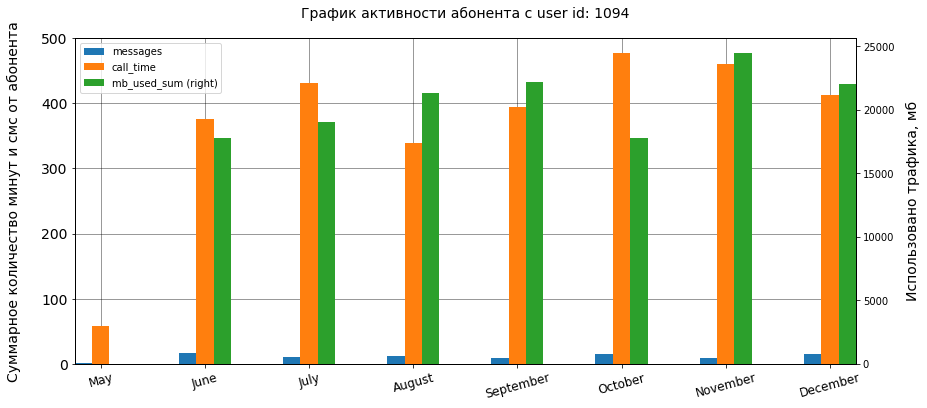

In [25]:
# Start testing
test_trafic = nan_testing(user_com_info, 'mb_used_sum')

# Get data
problem_user, problem_trafic = get_problems(test_trafic, df_users, df_internet, ltrafic = True)

print('Фамилии абонентов со странным трафиком')
display(problem_user)

print('Оригинальные данные по интернет трафику')
display(problem_trafic.head(10))

<font color='blue'>Вывод:</font> Анализ пропусков по интернет трафику показал, что предположение о том, что человек в том или ином месяц просто не использовал телефон для интернета является верным.

Выполним замену пропусков в столбцах

In [26]:
col_list = ['call_count', 'call_time', 'messages', 'mb_used_sum', 'mb_used_mean']

for col in col_list:
    user_com_info[col] = user_com_info[col].replace(np.nan, 0)

In [27]:
print(get_info(user_com_info  , 'user_com_info' )) 


 ******************** 

Общая информация для таблицы user_com_info 

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3214 entries, (1000, 5.0) to (1499, 12.0)
Data columns (total 6 columns):
call_count      3214 non-null float64
call_time       3214 non-null float64
messages        3214 non-null float64
mb_used_mean    3214 non-null float64
mb_used_sum     3214 non-null float64
tariff_name     3201 non-null object
dtypes: float64(5), object(1)
memory usage: 184.2+ KB


call_count  call_time  messages  mb_used_mean  mb_used_sum  \
user_id month                                                               
1000    5.0          22.0      159.0      22.0    564.000000       2256.0   
        6.0          43.0      172.0      60.0    528.568182      23257.0   
        7.0          47.0      340.0      75.0    500.571429      14016.0   
        8.0          52.0      408.0      81.0    521.111111      14070.0   
        9.0          58.0      466.0      57.0    583.240000      14581.0   

              tariff_name  
user_id month              
1000    5.0         ULTRA  
        6.0         ULTRA  
        7.0         ULTRA  
        8.0         ULTRA  
        9.0         ULTRA


 Количество NaN values для таблицы user_com_info: 
 call_count       0
call_time        0
messages         0
mb_used_mean     0
mb_used_sum      0
tariff_name     13
dtype: int64

 Названия столбцов для таблицы user_com_info: Index(['call_count', 'call_time', 'messages', 'mb_used_mean', 'mb_used_sum',
       'tariff_name'],
      dtype='object')

 ******************** 

None


С пропусками в колонках со звонками, смс и интернет трафиком мы разобрались, осталось выяснить почему же возникли пропуски в данных с информацией о тарифах

#### Анализ пропусков в данных по тарифу

Пропуски в колонке tariff_name 
 


call_count  call_time  messages  mb_used_mean  mb_used_sum  \
user_id month                                                               
1094    5.0          16.0      107.0       3.0           0.0          0.0   
1273    5.0          24.0      220.0      21.0           0.0          0.0   
        6.0          40.0      230.0      38.0           0.0          0.0   
        7.0          44.0      253.0      37.0           0.0          0.0   
        8.0          53.0      253.0      41.0           0.0          0.0   
        9.0          33.0      223.0      32.0           0.0          0.0   
        10.0         40.0      315.0      35.0           0.0          0.0   
        11.0         45.0      272.0      29.0           0.0          0.0   
        12.0         41.0      260.0      39.0           0.0          0.0   
1365    10.0          5.0       43.0       1.0           0.0          0.0   
1377    2.0          23.0      179.0       2.0           0.0          0.0   
1392    2.0           2.0       13.0       3.0           0.0          0.0   
1446    8.0           4.0       50.0       1.0           0.0          0.0   

              tariff_name  
user_id month              
1094    5.0           NaN  
1273    5.0           NaN  
        6.0           NaN  
        7.0           NaN  
        8.0           NaN  
        9.0           NaN  
        10.0          NaN  
        11.0          NaN  
        12.0          NaN  
1365    10.0          NaN  
1377    2.0           NaN  
1392    2.0           NaN  
1446    8.0           NaN

Фамилии абонентов со пропущенным тарифом


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
94,1094,37,NaT,Новосибирск,Даниэла,Пугачева,2018-05-28,ultra
273,1273,46,NaT,Курган,Рэм,Корнилов,2018-05-15,ultra
365,1365,38,NaT,Ростов-на-Дону,Георгий,Вишняков,2018-10-31,smart
377,1377,59,NaT,Брянск,Альфред,Семин,2018-02-25,ultra
392,1392,54,2018-09-27,Челябинск,Алла,Беликова,2018-02-27,ultra
446,1446,64,NaT,Липецк,Антонина,Артемчук,2018-08-31,smart


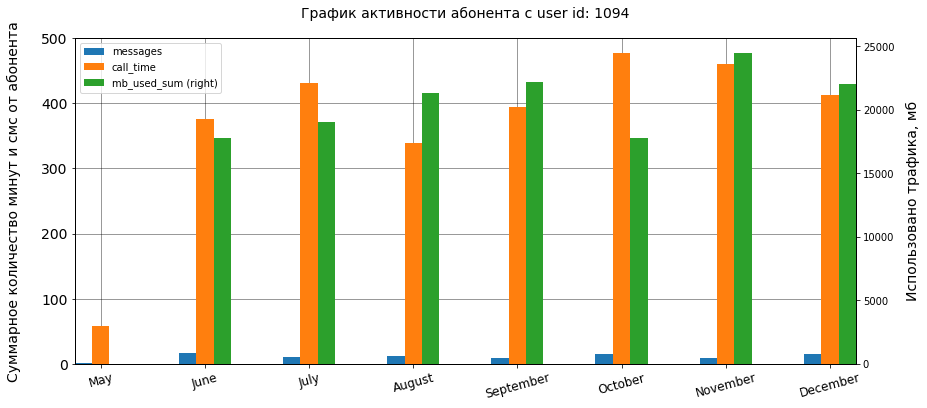

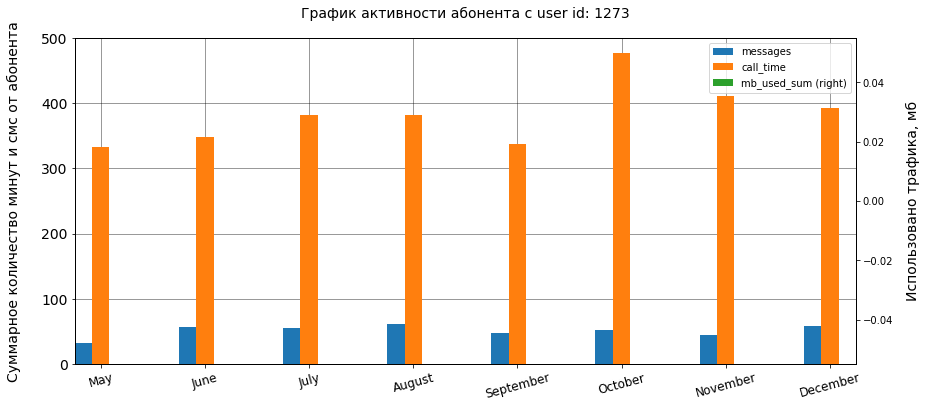

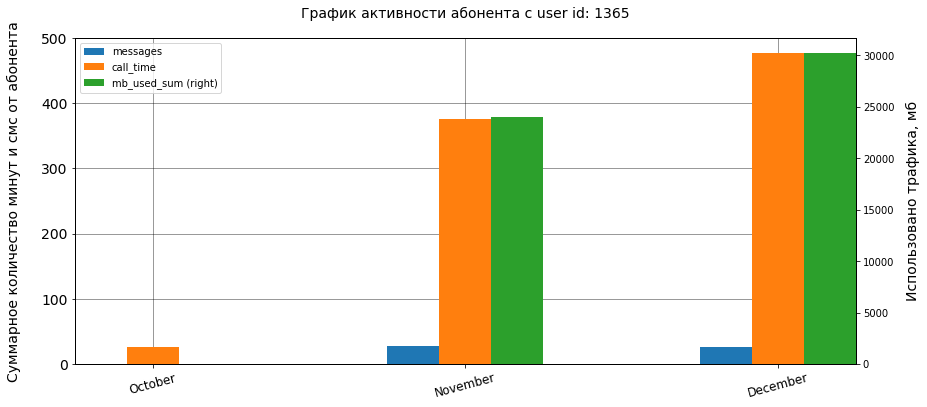

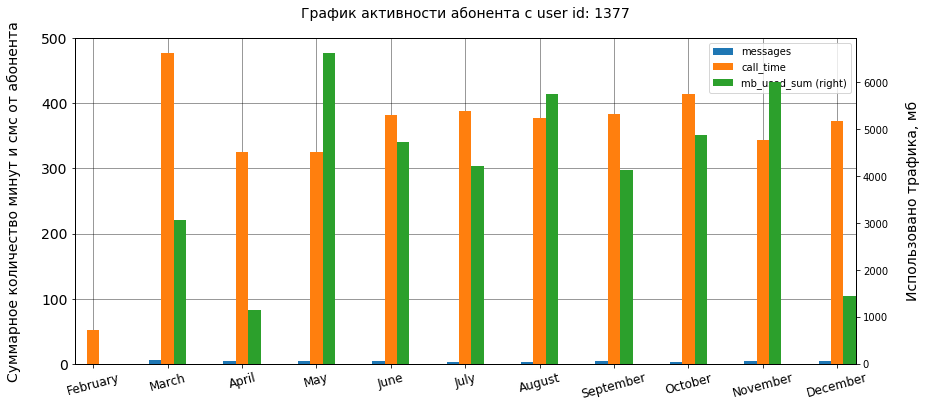

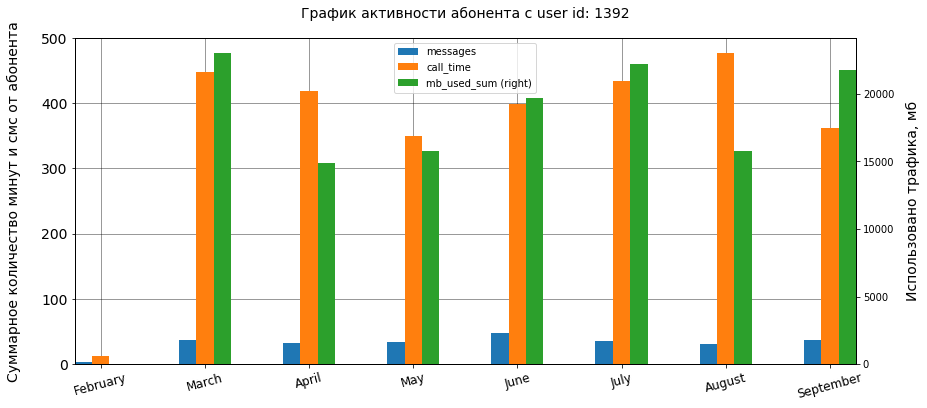

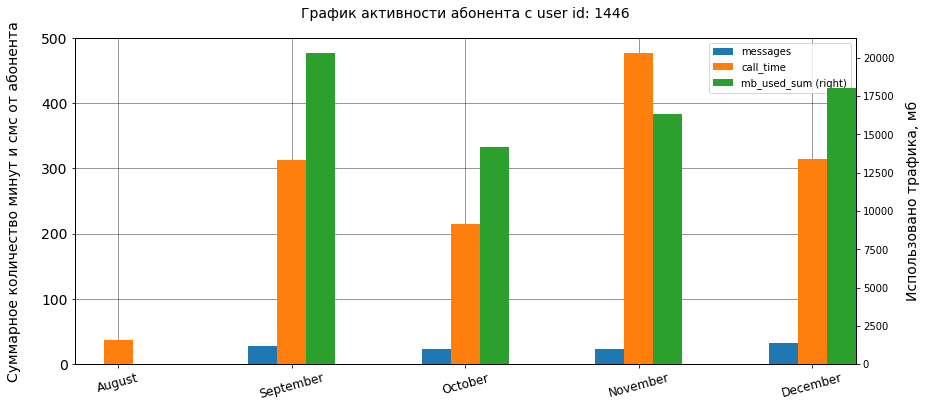

In [28]:
# Start testing
test_tarif = nan_testing(user_com_info, 'tariff_name')
display(test_tarif)

# Get user id of problem places
id_tarif   = test_tarif.index.get_level_values('user_id').unique()

problem_tarif = []
for id_user in id_tarif:
    problem_tarif.append(df_users.loc[df_users['user_id'] == id_user])
    plot4user = vis_user_activiti(user_com_info, id_user, 'messages', 'call_time', 'mb_used_sum')
    
df_problem_tarif = pd.concat(problem_tarif, axis = 0)

#tariff_name
print('Фамилии абонентов со пропущенным тарифом')
display(df_problem_tarif)

#print('Оригинальные данные по интернет трафику')
#display(problem_tarif.head(10))

<font color='blue'>Вывод:</font> Из анализа данных видно, что скорее всего пропуски в таблице в поле тариф, получены в результате объединения данных методом merge, который был использован ранее для создания таблицы **df_user_internet**. В результате слияния, образовались пустые ячейки для абонентов, которые в определенных месяц не пользовались интернетом, при этом совершали звонки или смс. В частности такие случаи представлены на гистограммах выше. К сожалению, найти данный ответ я смог только после тщательного анализа данных. Для заполнения пропусков в данном столбце я использую исходную таблицу абонентов, где у каждого пользователя есть присвоенный ему тарифный план. 

Сравнив таблицы **test_tarif** и **df_problem_tarif** можно определить какой тарифный план был у каждого пользователя на момент получения исходных данных. Остается дело за малым - заменить данные.

In [29]:
ultra_users = df_problem_tarif['user_id'].loc[df_problem_tarif.loc[:,'tariff'] == 'ultra'].values
smart_users = df_problem_tarif['user_id'].loc[df_problem_tarif.loc[:,'tariff'] == 'smart'].values

print(ultra_users)
print(smart_users)

[1094 1273 1377 1392]
[1365 1446]


Пользовательские тарифы выявлены, можно приступить к замене пропусков

In [30]:
for id_user in ultra_users:
    user_com_info.loc[id_user, "tariff_name"] = "ULTRA"
    
for id_user in smart_users:
    user_com_info.loc[id_user, "tariff_name"] = "SMART"
    

Теперь еденственное, что осталось сделать перед началом вычислений это изменить регистр в столбце **tariff_name** для того, что иметь общий формат данных с таблице, где представлены тарифные планы.

In [31]:
user_com_info['tariff_name'] =  user_com_info['tariff_name'].str.lower()
user_com_info

call_count  call_time  messages  mb_used_mean  mb_used_sum  \
user_id month                                                               
1000    5.0          22.0      159.0      22.0    564.000000       2256.0   
        6.0          43.0      172.0      60.0    528.568182      23257.0   
        7.0          47.0      340.0      75.0    500.571429      14016.0   
        8.0          52.0      408.0      81.0    521.111111      14070.0   
        9.0          58.0      466.0      57.0    583.240000      14581.0   
...                   ...        ...       ...           ...          ...   
1498    10.0         41.0      247.0      42.0    420.489796      20604.0   
1499    9.0           9.0       70.0      11.0    462.000000       1848.0   
        10.0         68.0      449.0      48.0    414.162791      17809.0   
        11.0         74.0      612.0      59.0    461.128205      17984.0   
        12.0         69.0      492.0      66.0    326.925000      13077.0   

              tariff_name  
user_id month              
1000    5.0         ultra  
        6.0         ultra  
        7.0         ultra  
        8.0         ultra  
        9.0         ultra  
...                   ...  
1498    10.0        smart  
1499    9.0         smart  
        10.0        smart  
        11.0        smart  
        12.0        smart  

[3214 rows x 6 columns]

Еще раз выполним проверку на наличие пропусков

In [32]:
print(get_info(user_com_info  , 'user_com_info' )) 


 ******************** 

Общая информация для таблицы user_com_info 

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3214 entries, (1000, 5.0) to (1499, 12.0)
Data columns (total 6 columns):
call_count      3214 non-null float64
call_time       3214 non-null float64
messages        3214 non-null float64
mb_used_mean    3214 non-null float64
mb_used_sum     3214 non-null float64
tariff_name     3214 non-null object
dtypes: float64(5), object(1)
memory usage: 344.5+ KB


call_count  call_time  messages  mb_used_mean  mb_used_sum  \
user_id month                                                               
1000    5.0          22.0      159.0      22.0    564.000000       2256.0   
        6.0          43.0      172.0      60.0    528.568182      23257.0   
        7.0          47.0      340.0      75.0    500.571429      14016.0   
        8.0          52.0      408.0      81.0    521.111111      14070.0   
        9.0          58.0      466.0      57.0    583.240000      14581.0   

              tariff_name  
user_id month              
1000    5.0         ultra  
        6.0         ultra  
        7.0         ultra  
        8.0         ultra  
        9.0         ultra


 Количество NaN values для таблицы user_com_info: 
 call_count      0
call_time       0
messages        0
mb_used_mean    0
mb_used_sum     0
tariff_name     0
dtype: int64

 Названия столбцов для таблицы user_com_info: Index(['call_count', 'call_time', 'messages', 'mb_used_mean', 'mb_used_sum',
       'tariff_name'],
      dtype='object')

 ******************** 

None


<font color='blue'>Вывод:</font> Исходные данные полностью готовы к дальнейшей обработке. 

### Расчет расходов абонентов

Для этого в первую очередь сформируем два отдельных датафрейма, в одном сгруппируем данные абонентов с тарифом **smart**, в другом **ultra**. Кроме того, с данными нужно будет сделать преобразования, для которых я создам небольшие функции.
1. Для изменения формата данных;
2. Для расчета звонков, смс и объемов интернет трафика больше лимита;
3. Для коррекции отрицательных значений, если абонент не превысил трафик;
4. Для расчета итоговой стоимости с учетом превышений лимитов;


In [33]:
# 1. Function for format corrections
def change_data_format(df):
    col_list = ['call_count', 'call_time'   , 
                'messages'  , 'mb_used_mean', 
                              'mb_used_sum' ]
    for col in col_list:
        if col in ['call_count', 'messages']:
            df[col] = df[col].astype('int64')
        else:
            df[col] = np.ceil(df[col]).astype('int64')
    return df

# 2. Function for calculations of over limits for call, sms and megabytes
def get_limits(df_tarif, df_limit4tarif):
    call_lim = df_tarif['call_time'] - df_limit4tarif['minutes_included']
    sms_lim  = df_tarif['messages']  - df_limit4tarif['messages_included']
    md_lim   = np.ceil((df_tarif['mb_used_sum'] - df_limit4tarif['mb_per_month_included']) / MB2GB).astype('int64')
    return call_lim, sms_lim, md_lim

# 3. Function for corrections negative values in colums with calls, sms and megabytes
def correct_negative_values(df):
    col_list = ['over_calls', 'over_sms', 'over_md']
    
    for row_index in range(len(df)):
        for col in col_list:
            if df[col][row_index] < 0:
                df[col][row_index] = 0
    return df

# 4. Function for calculation income
def company_income(df, df_tarif_cost):
    income = df_tarif_cost['rub_monthly_fee'] + (df['over_calls'] * df_tarif_cost['rub_per_minute'] 
                                               + df['over_sms']   * df_tarif_cost['rub_per_message']
                                               + df['over_md']    * df_tarif_cost['rub_per_gb']    )
    return income
    
    

#df_ultra['income'] = tarif_ultra['rub_monthly_fee'] + (  df_ultra['over_calls'] * tarif_ultra['rub_per_minute'] 
#                                                       + df_ultra['over_sms']   * tarif_ultra['rub_per_message']
#                                                      + df_ultra['over_md']    * tarif_ultra['rub_per_gb']    )

#### Тариф ULTRA

In [34]:
# Get actual data and costs for users with tarif ---> ultra
df_ultra    = user_com_info.loc[user_com_info.loc[:,'tariff_name'] == 'ultra']
tarif_ultra = df_tarrif.loc[1]

#display(df_ultra)
#display(tarif_ultra)

# Change format in dataframes
df_ultra = change_data_format(df_ultra)

# Get new columns for overlimits data
df_ultra['over_calls'], df_ultra['over_sms'], df_ultra['over_md'] = get_limits(df_ultra, tarif_ultra)

# Start negative values corrections 
df_ultra  = correct_negative_values(df_ultra)  

# Start total income calculations
df_ultra['income'] = company_income(df_ultra, tarif_ultra)

# Show new data
df_ultra

call_count  call_time  messages  mb_used_mean  mb_used_sum  \
user_id month                                                               
1000    5.0            22        159        22           564         2256   
        6.0            43        172        60           529        23257   
        7.0            47        340        75           501        14016   
        8.0            52        408        81           522        14070   
        9.0            58        466        57           584        14581   
...                   ...        ...       ...           ...          ...   
1495    8.0            17         92        13           654         2616   
        9.0           112        813        82           495        33105   
        10.0          152       1030        82           516        29393   
        11.0          129        954        79           557        38972   
        12.0          155       1031        84           510        23450   

              tariff_name  over_calls  over_sms  over_md  income  
user_id month                                                     
1000    5.0         ultra           0         0        0    1950  
        6.0         ultra           0         0        0    1950  
        7.0         ultra           0         0        0    1950  
        8.0         ultra           0         0        0    1950  
        9.0         ultra           0         0        0    1950  
...                   ...         ...       ...      ...     ...  
1495    8.0         ultra           0         0        0    1950  
        9.0         ultra           0         0        3    2400  
        10.0        ultra           0         0        0    1950  
        11.0        ultra           0         0        9    3300  
        12.0        ultra           0         0        0    1950  

[985 rows x 10 columns]

#### Тариф  SMART

In [35]:
# Get actual data and costs for users with tarif ---> smart
df_smart    = user_com_info.loc[user_com_info.loc[:,'tariff_name'] == 'smart']
tarif_smart = df_tarrif.loc[0]

#display(df_smart)
display(tarif_smart)

# Change format in dataframes
df_smart = change_data_format(df_smart)

# Get new columns for overlimits data
df_smart['over_calls'], df_smart['over_sms'], df_smart['over_md'] = get_limits(df_smart, tarif_smart)

# Start negative values corrections 
#df_smart  = correct_negative_values(df_smart) 
 
# Start total income calculations
#df_smart['income'] = company_income(df_smart, tarif_smart)

# Show new data
#df_smart

messages_included           50
mb_per_month_included    15360
minutes_included           500
rub_monthly_fee            550
rub_per_gb                 200
rub_per_message              3
rub_per_minute               3
tariff_name              smart
Name: 0, dtype: object

In [36]:
smart_call = df_smart['over_calls'].values
smart_sms  = df_smart['over_sms'].values
smart_md   = df_smart['over_md'].values

def corrections(data):
    for row_index in range(len(data)):
        if data[row_index] < 0:
            data[row_index] = 0
    return data
            
df_smart['over_calls'] = corrections(smart_call)
df_smart['over_sms']   = corrections(smart_sms)
df_smart['over_md']    = corrections(smart_md)

# Start total income calculations
df_smart['income'] = company_income(df_smart, tarif_smart)

df_smart

call_count  call_time  messages  mb_used_mean  mb_used_sum  \
user_id month                                                               
1001    11.0           59        430         0           393        18452   
        12.0           63        414         0           402        14053   
1002    6.0            15        117         4           403        10871   
        7.0            26        214        11           401        17601   
        8.0            42        289        13           407        20347   
...                   ...        ...       ...           ...          ...   
1498    10.0           41        247        42           421        20604   
1499    9.0             9         70        11           462         1848   
        10.0           68        449        48           415        17809   
        11.0           74        612        59           462        17984   
        12.0           69        492        66           327        13077   

              tariff_name  over_calls  over_sms  over_md  income  
user_id month                                                     
1001    11.0        smart           0         0        4    1350  
        12.0        smart           0         0        0     550  
1002    6.0         smart           0         0        0     550  
        7.0         smart           0         0        3    1150  
        8.0         smart           0         0        5    1550  
...                   ...         ...       ...      ...     ...  
1498    10.0        smart           0         0        6    1750  
1499    9.0         smart           0         0        0     550  
        10.0        smart           0         0        3    1150  
        11.0        smart         112         9        3    1513  
        12.0        smart           0        16        0     598  

[2229 rows x 10 columns]

<font color='blue'>Вывод:</font> В результате удалось получить две таблицы с помесячной прибылью от каждого абонента


## Анализ активности абонентов

In [37]:
users_ultra = df_ultra.reset_index()
users_smart = df_smart.reset_index()

### Тариф ULTRA

In [38]:
df_ultra_com = users_ultra.groupby(['month']).agg({'call_count' : ['count', 'sum', 'mean'],
                                                   'call_time'  : [         'sum', 'mean'],
                                                   'over_calls' : [         'sum'        ],
                                                   'messages'   : [         'sum', 'mean'],
                                                   'over_sms'   : [         'sum'        ],
                                                   'mb_used_sum': [         'sum'        ],
                                                   'over_md'    : [         'sum'        ],
                                                   'income'     : [         'sum'        ]})
# m   - mean
# t   - time
# tol - time_over_limit
# ol  - over limit

# Rename columns
df_ultra_com.columns = ['tot_users'    , 'tot_calls'  , 'm_calls'  ,
                                         'tot_calls_t', 'm_calls_t',
                                         'calls_tol'  ,
                                         'tot_sms'    , 'm_sms'    , 
                                         'sms_ol'     , 
                                         'tot_gb_used', 
                                         'gb_ol'      ,
                                         'tot_income' ]


col_list = ['m_calls', 'm_calls_t', 'm_sms', 'tot_gb_used']
for col in col_list:
    if col == 'tot_gb_used':
        df_ultra_com['tot_gb_used'] = np.ceil(df_ultra_com['tot_gb_used'] / MB2GB).astype('int64')
    else:
        df_ultra_com[col] = np.ceil(df_ultra_com[col]).astype('int64')

df_ultra_com

,tot_users,tot_calls,m_calls,tot_calls_t,m_calls_t,calls_tol,tot_sms,m_sms,sms_ol,tot_gb_used,gb_ol,tot_income
month,,,,,,,,,,,,
1.0,9,535,60,3853,429,0,304,34,0,116,0,17550
2.0,24,997,42,7131,298,0,527,22,0,277,4,47400
3.0,37,2504,68,18117,490,0,1195,33,0,635,16,74550
4.0,55,3525,65,25191,459,0,1736,32,0,905,19,110100
5.0,67,4858,73,34192,511,0,2536,38,0,1269,50,138150
6.0,84,5606,67,40295,480,0,3505,42,0,1554,51,171450
7.0,91,6896,76,49667,546,0,4536,50,0,1824,104,193050
8.0,107,7628,72,54653,511,0,5183,49,0,2048,95,222900
9.0,115,8579,75,62036,540,0,6013,53,0,2159,57,232800


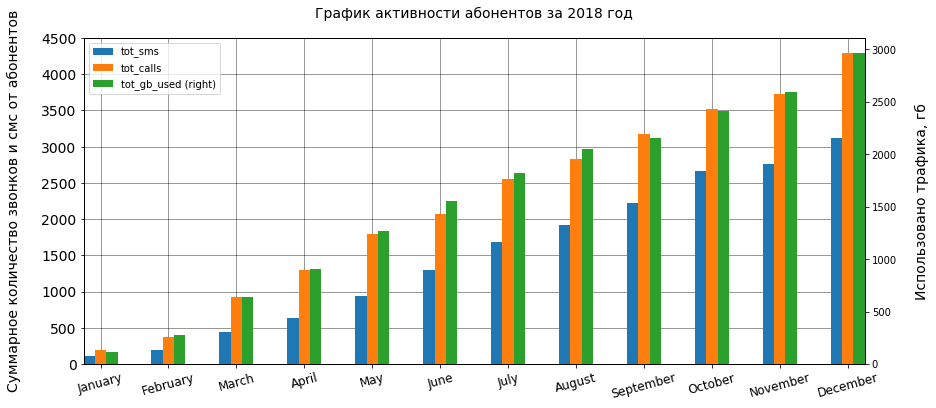

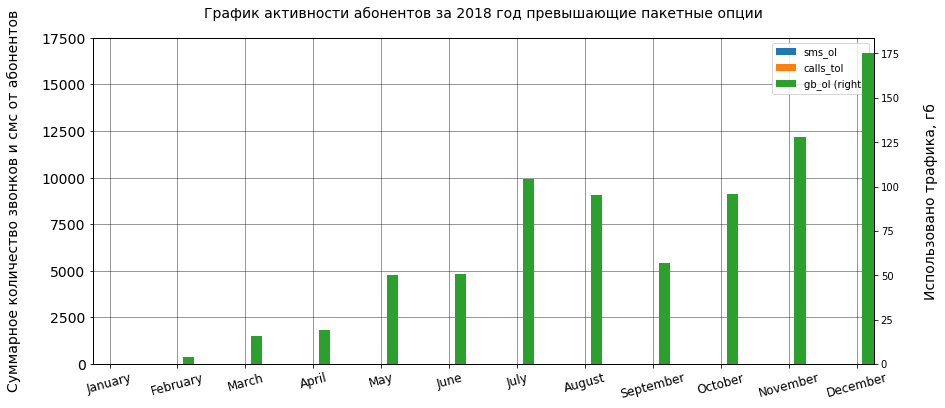

In [39]:
test_plot  = vis_user_activiti(df_ultra_com, None, 'tot_sms'         , 
                                                   'tot_calls'       , 
                                                   'tot_gb_used'     , 
                                                   plot_users = False)


test2_plot = vis_user_activiti(df_ultra_com, None, 'sms_ol'          , 
                                                   'calls_tol'       ,
                                                   'gb_ol'           ,
                                                   plot_users = False, 
                                                   llimit     = True )

'Описательная статистика:'

,user_id,month,call_count,call_time,messages,mb_used_mean,mb_used_sum,over_calls,over_sms,over_md,income
count,985.00,985.00,985.00,985.00,985.00,985.00,985.00,985.0,985.0,985.00,985.00
mean,1263.09,8.25,73.39,526.62,49.36,526.01,19486.90,0.0,0.0,0.81,2071.07
std,140.69,2.87,43.92,317.61,47.80,79.37,10096.32,0.0,0.0,2.53,378.80
min,1000.00,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,1950.00
25%,1143.00,6.00,41.00,284.00,6.00,498.00,11785.00,0.0,0.0,0.00,1950.00
50%,1277.00,9.00,74.00,518.00,38.00,532.00,19324.00,0.0,0.0,0.00,1950.00
75%,1381.00,11.00,104.00,752.00,79.00,566.00,26863.00,0.0,0.0,0.00,1950.00
max,1495.00,12.00,244.00,1673.00,224.00,732.00,49789.00,0.0,0.0,19.00,4800.00


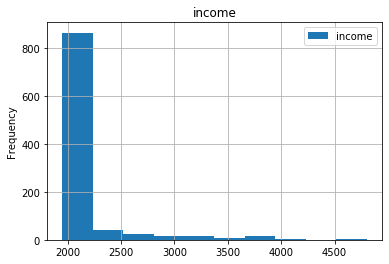

In [40]:
plot1 = histogram(users_ultra, 'income', 10)
stat = users_ultra.describe()
pd.set_option('display.precision', 2)
display(f'Описательная статистика:', stat)

<font color='blue'>Вывод:</font> Пользователи тарифа **ULTRA** в большинстве случаев за месяц пишут от 10 до 80 (в среднем 40) смс, и пользуются мобильной связью для совершения от 40 до 80 звонков, со средней продолжительностью 490 минут в месяц. Отличительной чертой тарифа **ULTRA** является активной использование интернета для работы и общения, так в среднем пользователи используют 10 гб до 27 гб интернета. Некоторые пользователи используют до 50 гб интернета.

На основании проведенного анализа данных видно, что большинство абонентов тарифа **ULTRA** не выходят за рамки пакетных опций, о чем свидетельствует значения 1950 рублей представленное в сводной статистической таблице, столбца **income**. Набор данных столбца **income** имеет лог. нормальное распределение, скошенное вправо (mean = 2070 > median = 1950).

В результате чего можно сделать вывод, что абоненты тарифа **ULTRA** имея более дорогой тариф, практически не выходят за его рамки, тем самым избегая дополнительных расходов за использование услуг мобильного оператора.




### Тариф SMART

In [41]:
df_smart_com = users_smart.groupby(['month']).agg({'call_count' : ['count', 'sum', 'mean'],
                                                   'call_time'  : [         'sum', 'mean'],
                                                   'over_calls' : [         'sum'        ],
                                                   'messages'   : [         'sum', 'mean'],
                                                   'over_sms'   : [         'sum'        ],
                                                   'mb_used_sum': [         'sum'        ],
                                                   'over_md'    : [         'sum'        ],
                                                   'income'     : [         'sum'        ]})
# m   - mean
# t   - time
# tol - time_over_limit
# ol  - over limit

# Rename columns
df_smart_com.columns = ['tot_users'    , 'tot_calls'  , 'm_calls'  ,
                                         'tot_calls_t', 'm_calls_t',
                                         'calls_tol'  ,
                                         'tot_sms'    , 'm_sms'    , 
                                         'sms_ol'     , 
                                         'tot_gb_used',  
                                         'gb_ol'      ,
                                         'tot_income' ]


col_list = ['m_calls', 'm_calls_t', 'm_sms', 'tot_gb_used']
for col in col_list:
    if col == 'tot_gb_used':
        df_smart_com['tot_gb_used'] = np.ceil(df_smart_com['tot_gb_used'] / MB2GB).astype('int64')
    else:
        df_smart_com[col] = np.ceil(df_smart_com[col]).astype('int64')

df_smart_com

,tot_users,tot_calls,m_calls,tot_calls_t,m_calls_t,calls_tol,tot_sms,m_sms,sms_ol,tot_gb_used,gb_ol,tot_income
month,,,,,,,,,,,,
1.0,34,941,28,6931,204,51,620,19,24,284,28,24525
2.0,58,2331,41,17324,299,860,1397,25,107,658,66,48001
3.0,77,4183,55,30034,391,2656,2453,32,386,1138,191,89676
4.0,112,5747,52,41119,368,3011,3443,31,411,1475,180,107866
5.0,141,7789,56,54618,388,3879,4762,34,754,2180,392,169849
6.0,164,9110,56,64885,396,4823,5478,34,930,2533,454,198259
7.0,201,11402,57,82079,409,6925,6784,34,1163,3095,561,247014
8.0,235,13860,59,99045,422,9560,7905,34,1470,3817,750,312340
9.0,260,15482,60,111439,429,11184,8746,34,1478,4145,727,326386


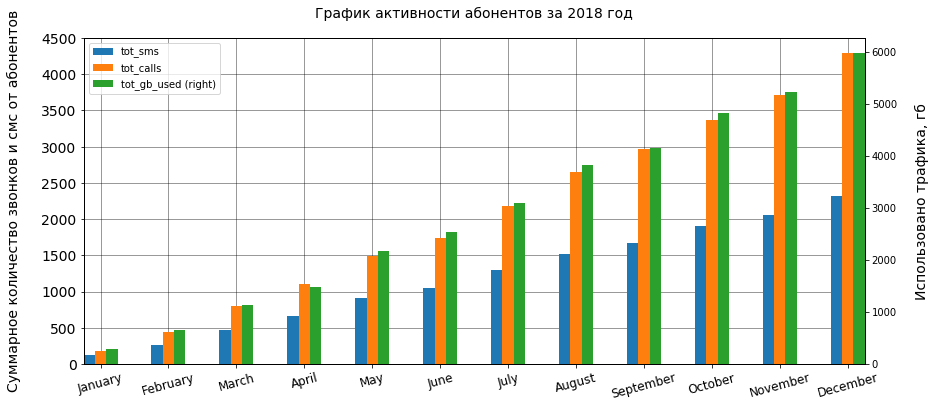

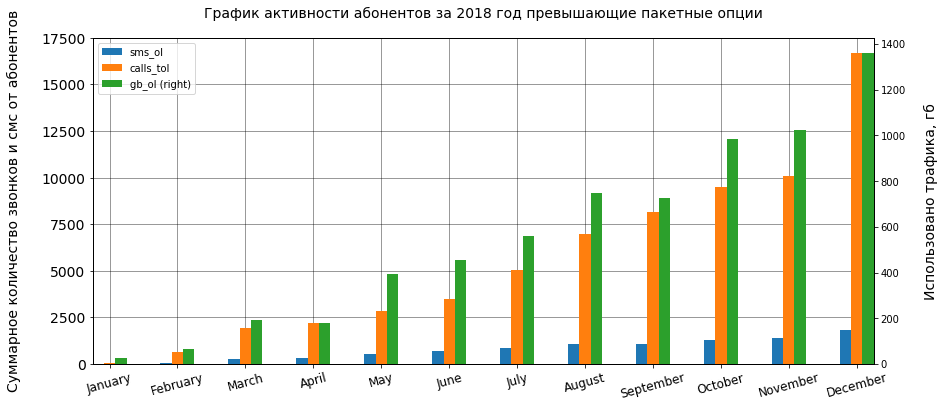

In [42]:
test_plot  = vis_user_activiti(df_smart_com, None, 'tot_sms'         , 
                                                   'tot_calls'       , 
                                                   'tot_gb_used'     , 
                                                   plot_users = False)


test2_plot = vis_user_activiti(df_smart_com, None, 'sms_ol'          , 
                                                   'calls_tol'       ,
                                                   'gb_ol'           ,
                                                   plot_users = False, 
                                                   llimit     = True )

'Описательная статистика: \n'

,user_id,month,call_count,call_time,messages,mb_used_mean,mb_used_sum,over_calls,over_sms,over_md,income
count,2229.00,2229.00,2229.00,2229.00,2229.00,2229.00,2229.00,2229.00,2229.00,2229.00,2229.00
mean,1246.51,8.35,58.46,417.93,33.38,386.79,16229.19,41.61,5.80,3.01,1294.64
std,146.12,2.92,25.94,190.31,28.23,44.45,5877.58,84.68,13.44,3.70,820.93
min,1001.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,550.00
25%,1121.00,6.00,40.00,282.00,10.00,362.00,12658.00,0.00,0.00,0.00,550.00
50%,1239.00,9.00,60.00,422.00,28.00,385.00,16531.00,0.00,0.00,2.00,1038.00
75%,1376.00,11.00,76.00,545.00,51.00,411.00,20068.00,45.00,1.00,5.00,1750.00
max,1499.00,12.00,198.00,1435.00,143.00,767.00,38610.00,935.00,93.00,23.00,6770.00


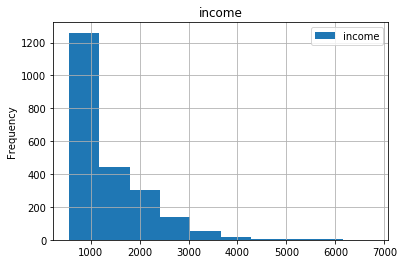

In [43]:
plot1 = histogram(users_smart, 'income', 10)
stat  = users_smart.describe()
pd.set_option('display.precision', 2)
display(f'Описательная статистика: \n', stat)

<font color='blue'>Вывод:</font> Пользователи тарифа **SMART** в большинстве случаев за месяц пишут от 10 до 50 (в среднем 30) смс, и пользуются мобильной связью для совершения от 40 до 80 звонков, со средней продолжительностью 400 минут в месяц. Интернет абоненты тарифа **SMART** в среднем используют от 12 гб до 20 гб интернета, некоторые пользователи используют до 40 гб интернета. Отличительной чертой тарифа **SMART** является то, что абонетны активно пользуются всеми предоставляемыми услугами тарифа, причем в большинстве случаев, как минимум по одному из оценочных показателей выходя за рамки пакетных услуг. Набор данных столбца **income** имеет лог. нормальное распределение, скошенное вправо (mean = 1246 > median = 1239).

На основании проведенного анализа данных видно, что большинство абонентов тарифа **SMART** имея более низкую абоненскую плату (550 рублей) практически каждый месяц доплачивают за использование  дополнительных услуг примерно такую же стоимость, как и за использования тарифа.

### Оценка прибыли компании от тарифов

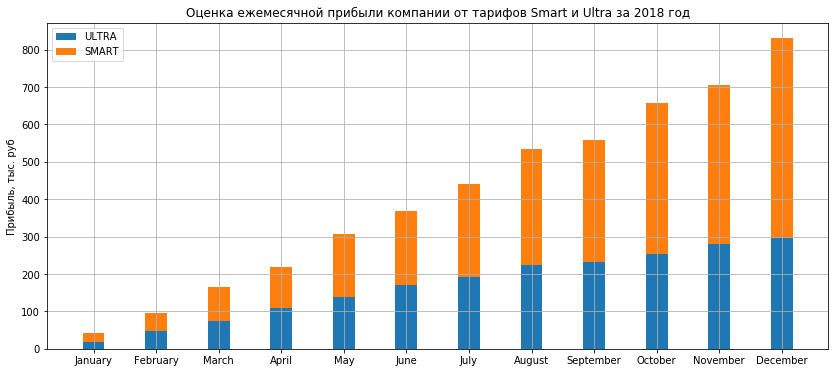

In [44]:
# Get visualizatiom    
fig, ax = plt.subplots(figsize = (14, 6))

tr_ultra = df_ultra_com['tot_income'].values / 1000
tr_smart = df_smart_com['tot_income'].values / 1000
                     
ind      = df_ultra_com.index  #np.arange(N)

width = 0.35

p1 = plt.bar(ind, tr_ultra, width)
p2 = plt.bar(ind, tr_smart, width, bottom = tr_ultra)


plt.title('Оценка ежемесячной прибыли компании от тарифов Smart и Ultra за 2018 год')
plt.ylabel('Прибыль, тыс. руб')             
             
# Get month labels for our user
month_labels = []
for mon in df_ultra_com.index:
    month_labels.append(calendar.month_name[int(mon)])

# Plot data
   
# Set labels for x axis
#N = 12
x_values = np.arange(1, len(month_labels) + 1, 1)
plt.xticks(x_values, month_labels)             
plt.legend((p1[0], p2[0]), ('ULTRA', 'SMART'))

plt.grid(True)

plt.show()

<font color='blue'>Вывод:</font> Оценив суммурнаю прибыль компании от двух тарифов можно заметить:
1. Компания сотовой связи ведет правильную рекламную политику по привлечению дополнительных клиентов, о чем свидетельсвтвует сразу несколько показателей (рост числа абонентов, рост суммарного количества смс, звонков и использованного интернета), что существенно сказывается на увеличении прибыли компании, о чем свитедельствуют ежемесячные значения в столбце с прибылью компании.
2. Пользователи тарифа **ULTRA** ежемесячно платят более большую абонентскую плату, при этом практически не используют дополнительные пакетные опции для совершения дополнительных звонков и смс, и платя дополнительные деньги лишь за дополнительные гигабайты. Не принося компании дополнительной выгоды. 
3. Пользователи тарифа **SMART** ежемесячно платят более низкую абоненскую плату, при этом редкому абоненту удается уложится в рамки услуг, предоставляемых по действующему тарифному плану. В среднем абоненты тарифа **SMART** платят дополнительные 400 - 450 рублей за использования услуг, превышающих пакетные ограничения, тем самым принося компании дополнительную выручку. 
4. График ежемесячной выручки показывает, что прибыль компании от тарифа **SMART** является более высокой, чем от тарифа **ULTRA**. Кроме того, график также показывает, что новые пользователи в основном выбирают тариф **SMART**, о чем свидетельствует более резкий рост прибыли по данному тарифу, в то время как тариф **ULTRA** выбирает относительно небольшой процент новых абонентов, о чем свидетельствует крайне малый рост прибыли начиная с июля месяца.


## Проверка гипотез

### Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются:

Исчерпывающей характеристикой любой случайной величины является ее функция распределения (интегральная или дифференциальная). Но основные свойства СВ (хотя и не все) могут быть описаны более компактно с помощью нескольких числовых характеристик (параметров распределения). Поэтому найдем наиболее важную числовую характеристику - центр распределения. 

Существует, по крайней мере, три параметра, характеризующих положение центра распределения (или короче - три характеристики положения): мода, медиана и математическое ожидание, но моду, пока не будем считать. 

математическое ожидание выборки = среднему выборки


In [45]:
# известно, что датасет — не вся совокупность, а выборка из неё
def statistic(df, name):
    data     = df['income'].values
    
    dmean    = np.mean(data)
    dmeadian = np.median(data)
    dstd     = np.std(data, ddof = 1)
    dvar     = np.var(data, ddof = 1)
    
    print(f'Statistic parameters for {name}')
    print(f'Mean  : {dmean:.1f}'   )
    print(f'Median: {dmeadian:.1f}')
    print(f'STD   : {dstd:.1f}'    )
    print(f'VAR   : {dvar:.0f}'    )
    return data

# Get statistical information
ultra_statistic = statistic(users_ultra, 'user ULTRA tarif')
smart_statistic = statistic(users_smart, 'user SMART tarif')

Statistic parameters for user ULTRA tarif
Mean  : 2071.1
Median: 1950.0
STD   : 378.8
VAR   : 143491
Statistic parameters for user SMART tarif
Mean  : 1294.6
Median: 1038.0
STD   : 820.9
VAR   : 673931


Сформулируем статистическую гипотезу. Принимаю **нулевую гипотезу** $H_{0}$, что $m_{x_{\ SMART}} = 2070$, принимаю алтернативную гипотезу, что $m_{x_{\ SMART}} \neq 1950$

Для проверки гипотезы использую использую специальный тест - критерий Стьюдента (t-критерий), который базируется на использовании статистики Стьюдента. В частности нам нужно проверить гипотезу о равенстве средних двух выборок. 

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, примените `метод` scipy.stats.ttest_ind (array1, array2, equal_var).

In [46]:
alpha = 0.05  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(ultra_statistic, smart_statistic)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 2.9776448000521676e-158
Отвергаем нулевую гипотезу


<font color='blue'>Вывод:</font> Гипотеза о равенстве средних двух выборок при уровне значимости 2а = 10% опровергается и следовательно, предположение о том, что средняя выручка пользователей тарифов "Ултра" и "Смарт" различаются является верной

### Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов:

Для того, чтобы ответить на данный вопрос нужно сделать несколько предварительных шагов:
1. Добавить в таблицы users_ultra и users_smart информацию о местоположении абонента.
2. Создать новые датафреймы для пользователей из Москвы и остальных городов России
3. Посчитать статистику

#### Тариф ULTRA

In [47]:
# Get city for all users with ULTRA 
df_ultra_city = df_users.query('tariff == "ultra"')

# Add city to users
df_users_ultra = (users_ultra
                    .merge(df_ultra_city, on = 'user_id', how = 'outer')              # Merge 
                    .drop(['churn_date', 'age'     , 'first_name',                    # Drop columns 
                           'last_name' , 'reg_date', 'tariff'    ], axis = 1)           #  
                    .dropna(thresh = 11)                                              # Drop line with NaN
                    .reset_index(drop = True)                                         # Reset index
                 )


display(df_users_ultra)
display(df_users_ultra.isnull().sum())

,user_id,month,call_count,call_time,messages,mb_used_mean,mb_used_sum,tariff_name,over_calls,over_sms,over_md,income,city
0,1000,5.0,22.0,159.0,22.0,564.0,2256.0,ultra,0.0,0.0,0.0,1950.0,Краснодар
1,1000,6.0,43.0,172.0,60.0,529.0,23257.0,ultra,0.0,0.0,0.0,1950.0,Краснодар
2,1000,7.0,47.0,340.0,75.0,501.0,14016.0,ultra,0.0,0.0,0.0,1950.0,Краснодар
3,1000,8.0,52.0,408.0,81.0,522.0,14070.0,ultra,0.0,0.0,0.0,1950.0,Краснодар
4,1000,9.0,58.0,466.0,57.0,584.0,14581.0,ultra,0.0,0.0,0.0,1950.0,Краснодар
...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,1495,8.0,17.0,92.0,13.0,654.0,2616.0,ultra,0.0,0.0,0.0,1950.0,Иркутск
981,1495,9.0,112.0,813.0,82.0,495.0,33105.0,ultra,0.0,0.0,3.0,2400.0,Иркутск
982,1495,10.0,152.0,1030.0,82.0,516.0,29393.0,ultra,0.0,0.0,0.0,1950.0,Иркутск
983,1495,11.0,129.0,954.0,79.0,557.0,38972.0,ultra,0.0,0.0,9.0,3300.0,Иркутск


user_id         0
month           0
call_count      0
call_time       0
messages        0
mb_used_mean    0
mb_used_sum     0
tariff_name     0
over_calls      0
over_sms        0
over_md         0
income          0
city            0
dtype: int64

In [48]:
# Get new dataframes
df_ultra_moscow = df_users_ultra.query('city == "Москва"')
df_ultra_other  = df_users_ultra.query('city != "Москва"')

# Get statistic
ultra_statistic_moscow = statistic(df_ultra_moscow, 'Users ULTRA Moscow')
ultra_statistic_other  = statistic(df_ultra_other , 'Users ULTRA Other')

Statistic parameters for Users ULTRA Moscow
Mean  : 2075.3
Median: 1950.0
STD   : 353.1
VAR   : 124646
Statistic parameters for Users ULTRA Other
Mean  : 2069.8
Median: 1950.0
STD   : 386.3
VAR   : 149235


Выполним проверку гипотезы: Принимаю, что для Москвы **нулевая гипотеза** $H_{0}$, $m_{x_{\ ULTRA}} = 2069$, принимаю **алтернативную гипотезу** $H_{1}$, что $m_{x_{\ ULTRA}} \neq 2069$

Для проверки гипотезы использую использую специальный тест - критерий Стьюдента (t-критерий), который базируется на использовании статистики Стьюдента. В частности нам нужно проверить гипотезу о равенстве средних двух выборок. 

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, примените `метод` scipy.stats.ttest_ind (array1, array2, equal_var).

In [49]:
alpha = 0.05  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(ultra_statistic_moscow, ultra_statistic_other)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.8475623384854951
Не получилось отвергнуть нулевую гипотезу


<font color='blue'>Вывод:</font> Гипотеза о равенстве средних двух выборок при уровне значимости 2а = 10% неопровергается и следовательно, предположение о том, что cредняя выручка пользователей тарифа **ULTRA** из Москвы отличается от выручки пользователей тарифа **ULTRA** из других регионов является не верным.

#### Тариф SMART

In [50]:
# Get city for all users with SMART 
df_smart_city = df_users.query('tariff == "smart"')

# Add city to users
df_users_smart = (users_smart
                    .merge(df_smart_city, on = 'user_id', how = 'outer')              # Merge 
                    .drop(['churn_date', 'age'     , 'first_name',                    # Drop columns 
                           'last_name' , 'reg_date', 'tariff'    ], axis = 1)           #  
                    .dropna(thresh = 11)                                              # Drop line with NaN
                    .reset_index(drop = True)                                         # Reset index
                 )


display(df_users_smart)
display(df_users_smart.isnull().sum())

,user_id,month,call_count,call_time,messages,mb_used_mean,mb_used_sum,tariff_name,over_calls,over_sms,over_md,income,city
0,1001,11.0,59.0,430.0,0.0,393.0,18452.0,smart,0.0,0.0,4.0,1350.0,Москва
1,1001,12.0,63.0,414.0,0.0,402.0,14053.0,smart,0.0,0.0,0.0,550.0,Москва
2,1002,6.0,15.0,117.0,4.0,403.0,10871.0,smart,0.0,0.0,0.0,550.0,Стерлитамак
3,1002,7.0,26.0,214.0,11.0,401.0,17601.0,smart,0.0,0.0,3.0,1150.0,Стерлитамак
4,1002,8.0,42.0,289.0,13.0,407.0,20347.0,smart,0.0,0.0,5.0,1550.0,Стерлитамак
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2224,1498,10.0,41.0,247.0,42.0,421.0,20604.0,smart,0.0,0.0,6.0,1750.0,Владикавказ
2225,1499,9.0,9.0,70.0,11.0,462.0,1848.0,smart,0.0,0.0,0.0,550.0,Пермь
2226,1499,10.0,68.0,449.0,48.0,415.0,17809.0,smart,0.0,0.0,3.0,1150.0,Пермь
2227,1499,11.0,74.0,612.0,59.0,462.0,17984.0,smart,112.0,9.0,3.0,1513.0,Пермь


user_id         0
month           0
call_count      0
call_time       0
messages        0
mb_used_mean    0
mb_used_sum     0
tariff_name     0
over_calls      0
over_sms        0
over_md         0
income          0
city            0
dtype: int64

In [51]:
# Get new dataframes
df_smart_moscow = df_users_smart.query('city == "Москва"')
df_smart_other  = df_users_smart.query('city != "Москва"')

# Get statistic
smart_statistic_moscow = statistic(df_smart_moscow, 'Users SMART Moscow')
smart_statistic_other  = statistic(df_smart_other , 'Users SMART Other' )

Statistic parameters for Users SMART Moscow
Mean  : 1245.1
Median: 1011.5
STD   : 755.0
VAR   : 570033
Statistic parameters for Users SMART Other
Mean  : 1305.0
Median: 1040.0
STD   : 833.9
VAR   : 695390


Выполним проверку гипотезы: Принимаю, что для Москвы **нулевая гипотеза** $H_{0}$, $m_{x_{\ SMART}} = 1268$, принимаю **алтернативную гипотезу** $H_{1}$, что $m_{x_{\ SMART}} \neq 1268$

In [52]:
alpha = 0.05  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(smart_statistic_moscow, smart_statistic_other)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.19196326570657848
Не получилось отвергнуть нулевую гипотезу


<font color='blue'>Вывод:</font> Гипотеза о равенстве средних двух выборок при уровне значимости 2а = 10% неопровергается и следовательно, предположение о том, что cредняя выручка пользователей тарифа **SMART** из Москвы отличается от выручки пользователей тарифа **SMART** из других регионов является не верным.

#### Дополнительный комментарий

В задании изначально гипотеза строилась таким образом, что разбивать пользователей с тарифом смарт и ултра на две дополнительные под категории для Москвы и других городов не требовалось, но я осознал данный факт только после того, как все посчитал. Но исходя из полученных данных можно утверждать, что поскольку: гипотеза о равенстве средних двух выборок при уровне значимости 2а = 10% неопровергается для обоих тарифов, следовательно и предположение о том, что cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов является не верным.

## Общий вывод по работе

В ходе работы были получены и проанализированы данные за 2018 год для пользователей тарифов **SMART** и **ULTRA**. На основе полученных данных было установлено, что тариф **SMART**, приносит компании больше прибыли (почти в два раза - на момент декабря 2018 года), чем тариф **ULTRA**. Кроме того было установлено, что нет существенной разницы в средней прибыли компании для Москвы и других регионов России.

Рекомендации: Требуется более детальный анализ тарифа **ULTRA** для привлечения дополнительного внимания к данному тарифу, в частности снижения абоненской платы. 